# HOMEWORK 12

In this homework you are going to inspect the GTSDB (German Traffic Sign Detection Benchmark) dataset. The dataset contains images of various classes of traffic signs used in Germany (and the whole EU). The objective of this homework is to go through the steps described below and to implement the necessary code.

At the end, as usual, there will be a couple of questions for you to answer. In addition, the last section of this homework is optional and, if you chose to do it, you'll earn extra point :-)

In [150]:
import os
import cv2
import numpy as np
import pandas as pd
from collections import Counter

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

In [151]:
# Load the training labels
root = 'GTSRB' 
data = pd.read_csv(os.path.join(root, 'Train.csv'))
# Number of training samples (amount of samples in data)
num_samples = len(data)
print(num_samples)

39209


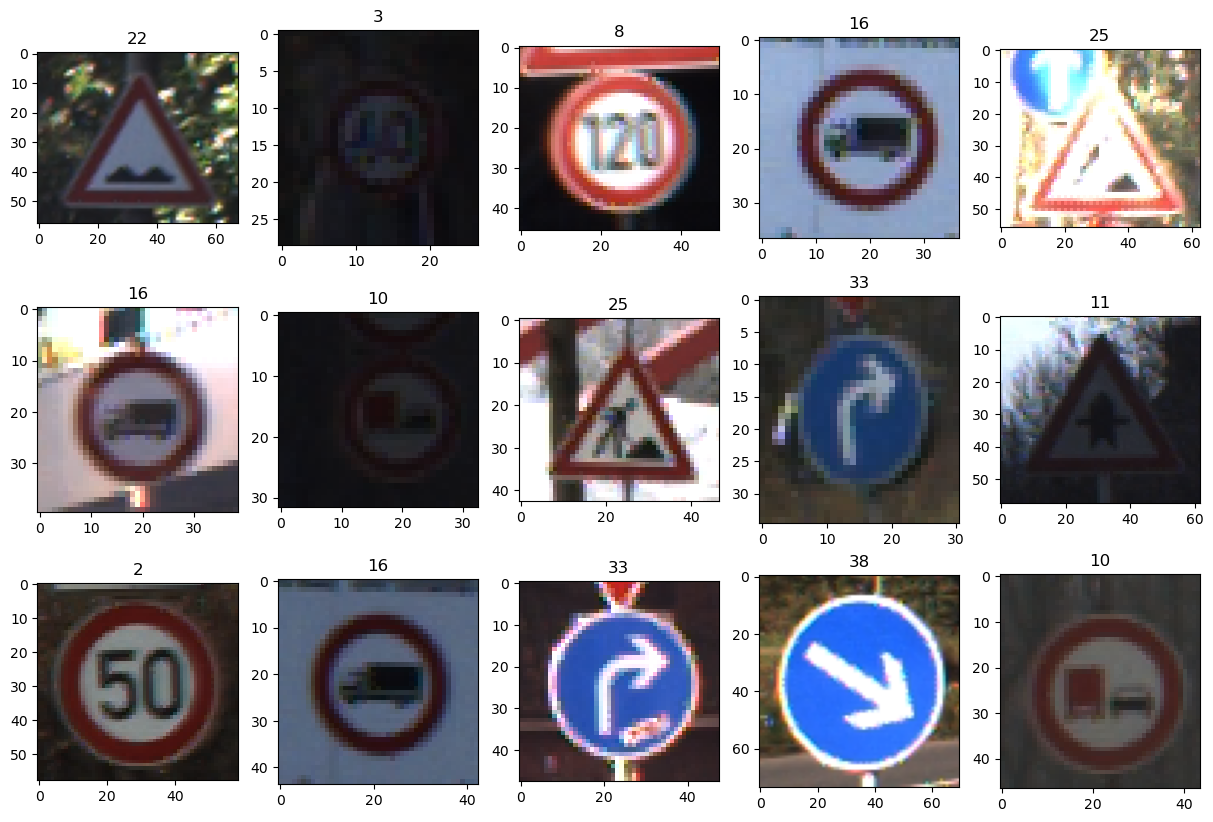

In [152]:
# Show random data samples
for ii in range(15):
    # Get random index
    idx = np.random.randint(0, num_samples)
    # Load image
    img = cv2.imread(os.path.join(root, data.iloc[idx]['Path']))
    # Convert image to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
    # Show image
    plt.subplot(3,5,ii+1), plt.imshow(img), plt.title(data.iloc[idx]['ClassId'])

In [153]:
# Extract class identifiers
# Hint: Check the csv 
class_indexes = []
#Extract class identifiers without indexes
idx = data.loc[:,['ClassId']].values
for i in idx:
    i = int(i)
    class_indexes.append(i)
#ids = set(indexes)
print(class_indexes)

[20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,

(Text(0.5, 0, 'Traffic Sign ID'), Text(0, 0.5, 'Counts'))

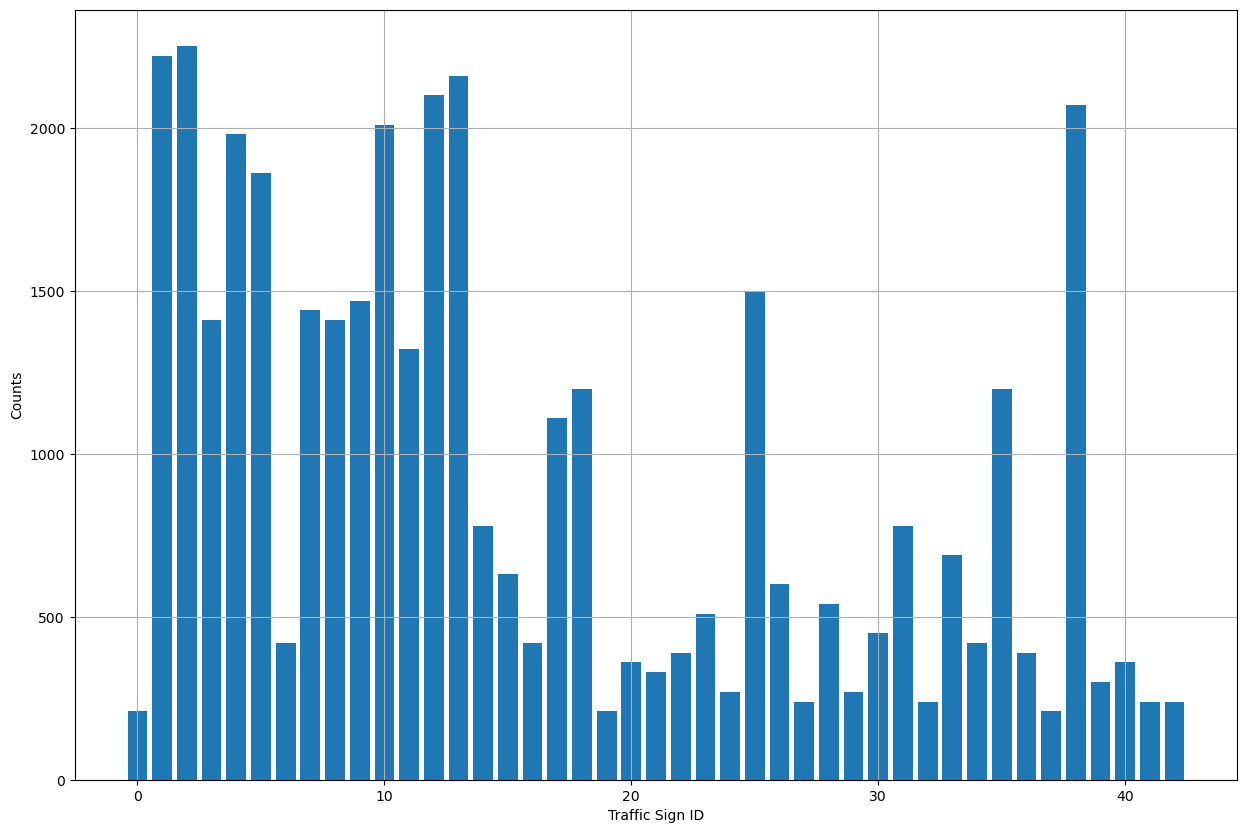

In [154]:
hist_class_ids = Counter(class_indexes)

plt.bar(hist_class_ids.keys(), hist_class_ids.values()), plt.grid(True)
plt.xlabel('Traffic Sign ID'), plt.ylabel('Counts')

In [155]:
# Discovering image resolutions in data samples
img_resolution = []
for ii in range(num_samples):
    # Load image
    img = cv2.imread(os.path.join(root, data.iloc[ii]['Path']))
    # Convert image to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
    # Adding values into the list without the channel values
    img_resolution.append(img.shape[:2])
resolution_counts = Counter(img_resolution)
print(resolution_counts.most_common())
#I don't know how to create a histogram with 2D array and a counter:( 
#I just printed the amounts of the most frequent image resolutions (rowsxcols)

[((31, 31), 396), ((30, 30), 380), ((35, 35), 360), ((32, 32), 352), ((33, 33), 351), ((38, 38), 345), ((34, 34), 339), ((29, 29), 338), ((31, 30), 337), ((36, 36), 334), ((33, 32), 326), ((34, 33), 318), ((37, 37), 310), ((40, 40), 297), ((30, 29), 297), ((35, 34), 280), ((32, 31), 276), ((36, 35), 273), ((43, 43), 265), ((28, 28), 263), ((39, 39), 262), ((33, 34), 262), ((37, 36), 262), ((41, 41), 259), ((39, 38), 249), ((29, 28), 247), ((30, 31), 243), ((40, 39), 238), ((34, 35), 229), ((41, 40), 229), ((38, 37), 229), ((31, 32), 228), ((32, 33), 222), ((42, 42), 210), ((36, 37), 210), ((29, 30), 204), ((37, 38), 199), ((35, 36), 196), ((27, 27), 194), ((28, 27), 193), ((44, 44), 188), ((38, 39), 183), ((42, 41), 177), ((39, 40), 174), ((28, 29), 173), ((40, 41), 161), ((46, 46), 161), ((43, 42), 160), ((45, 45), 158), ((32, 30), 158), ((48, 48), 156), ((41, 42), 147), ((45, 44), 147), ((47, 47), 145), ((36, 34), 144), ((42, 43), 143), ((47, 46), 142), ((33, 31), 136), ((52, 52), 13

I am not sure that everything done below is correct, but at least I tried:) So my algorithm to investigate the brightness by each class was:
1.Convert all images to gray scale as I found that in the dataset were present both 3-channels and 1-channels imgs.
2.Compute the mean value for every image and round it.
3.Add tuple with class id and mean value in the list and then make a histogram.

In [156]:
brightness = []

for ii in range(num_samples):
    indexes_br = []
    # Get random index
    idx = np.random.randint(0, num_samples)
    # Load image
    img = cv2.imread(os.path.join(root, data.iloc[ii]['Path']))
    class_id  = data.loc[ii]['ClassId']
    # Convert image to 
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    for r in range(img.shape[0]):
        for c in range(img.shape[1]):
            indexes_br.append(img[r,c])
    m = round(np.mean(indexes_br),0)
    brightness.append((class_id, m))


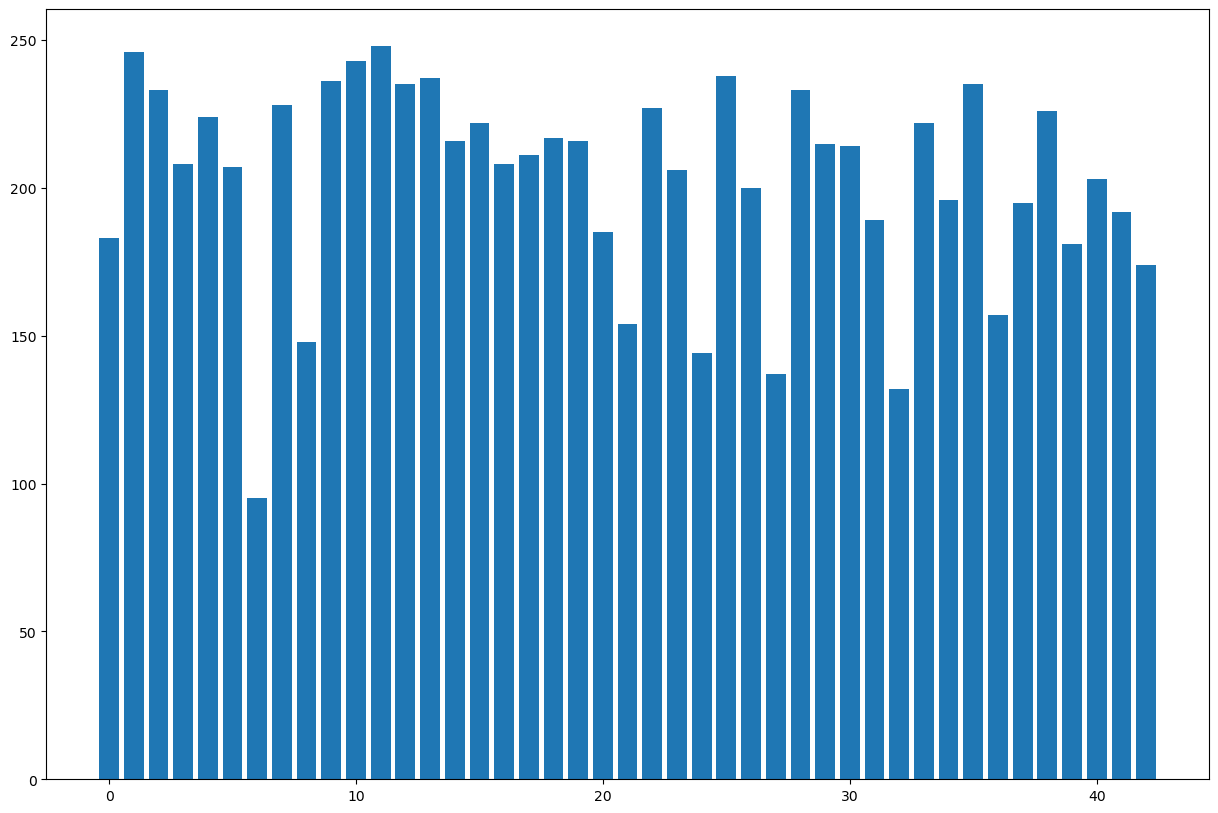

In [157]:
ind = []
fre = []
for item in brightness:
   ind.append(item[0])
   fre.append(item[1])

plt.bar(ind, fre)

plt.show()

### Questions

Please answer the following questions:
* Do you consider the dataset to be balanced? If so, why? If not, why?
* Are there any classes that are (significantly) over-represented or under-represeneted?

1.As can be seen on the histogram the dataset is rather not balanced.The amount of data assigend to class id 0, 6, 16, 19-24, 27, 29, 32, 34, 36,37 39-42 seems to be insufficient at the same time classes id 1, 2, 12-13, 38 are over-represented.

Optional

Perform a further analysis on the dataset and draw some conclusion from it.

Hint 1: Unlike MNIST or CIFAR10, this dataset contains images with various spatial resolutions. Is there anything we can tell about the resolution distribution? 
Hint 2: What about the brightness distribution? Are there classes there are significantly more bright than others?

1.The amount of the smaller images (with resolution near 3Xx3Y or slightly larger) is bigger than the number of thelarge images.
2.If I made everything right, the histogram shows that the distribution of the brightness is rather uniform.